In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn import metrics

Data Collection and Processing

In [86]:
#loading the data from csv file to a pandas df
calories = pd.read_csv('calories.csv')

In [87]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [88]:
exercise_data = pd.read_csv('exercise.csv')

In [89]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the dataframes

In [91]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [92]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [93]:
#checking number of rows and columns
calories_data.shape

(15000, 9)

In [94]:
# get info about data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [95]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [97]:
#get statistical measures from the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [99]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

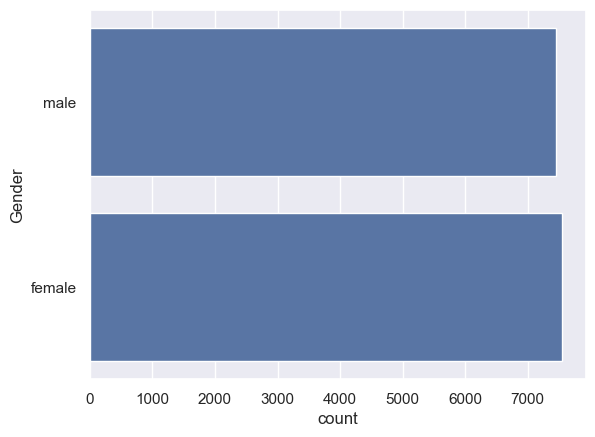

In [100]:
#plottin gender column 
sns.countplot(calories_data["Gender"])

<Axes: xlabel='Age', ylabel='Count'>

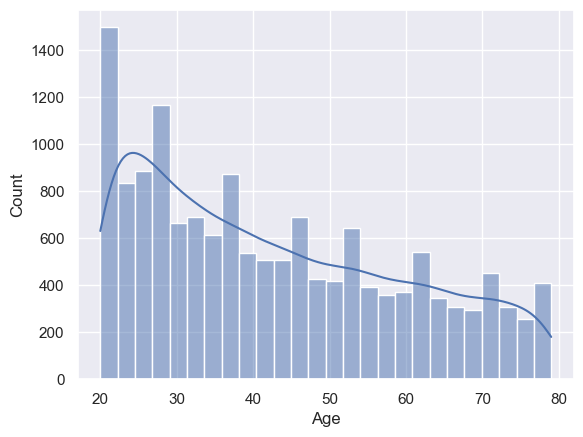

In [101]:
#finding distribution of age, height, weight,duration, body temp, calories
sns.histplot(calories_data["Age"],kde=True)

<Axes: xlabel='Height', ylabel='Count'>

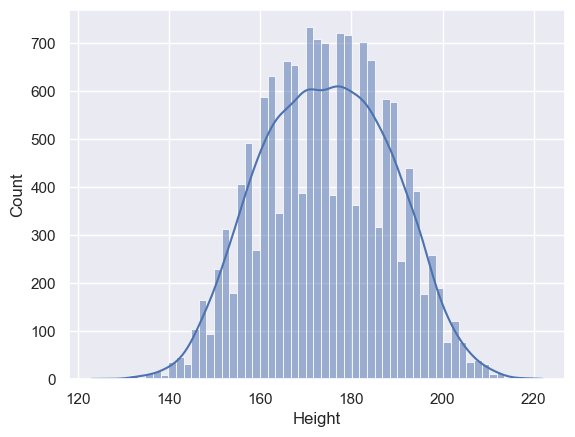

In [102]:
sns.histplot(calories_data["Height"],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

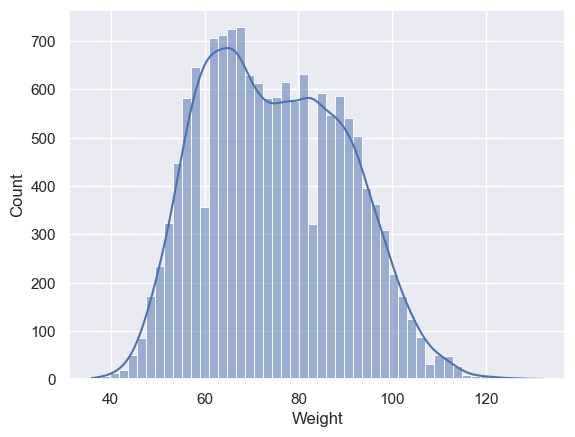

In [103]:
sns.histplot(calories_data["Weight"],kde=True)

<Axes: xlabel='Duration', ylabel='Count'>

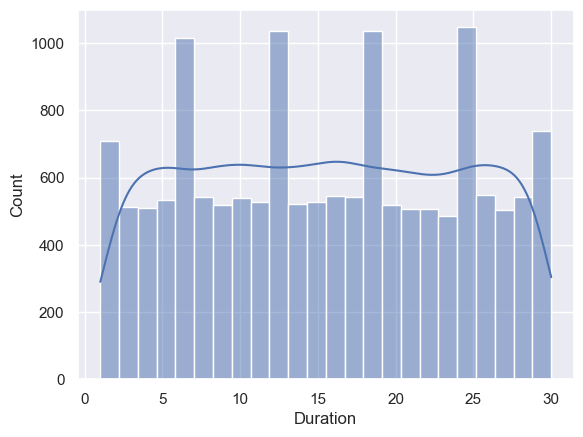

In [104]:
sns.histplot(calories_data["Duration"],kde=True)

<Axes: xlabel='Heart_Rate', ylabel='Count'>

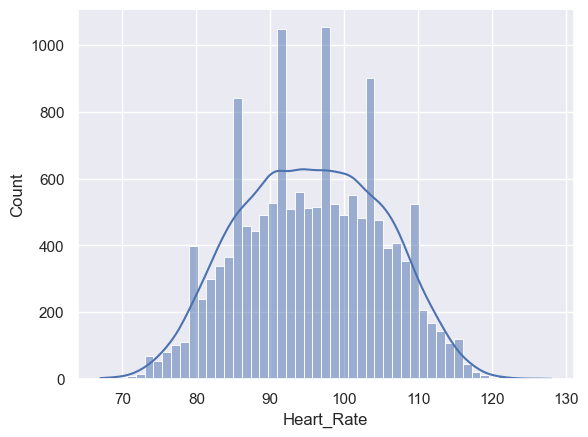

In [105]:
sns.histplot(calories_data["Heart_Rate"],kde=True)

<Axes: xlabel='Body_Temp', ylabel='Count'>

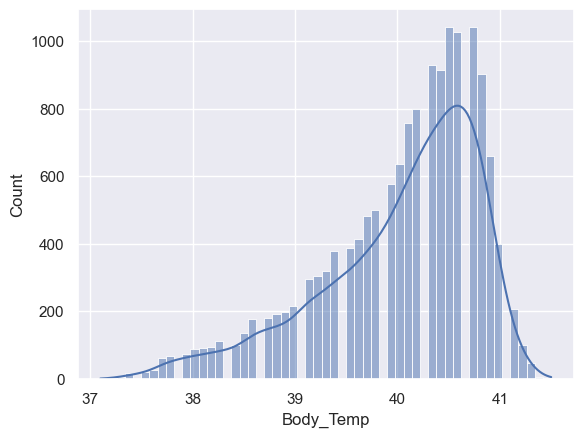

In [106]:
sns.histplot(calories_data["Body_Temp"],kde=True)

<Axes: xlabel='Calories', ylabel='Count'>

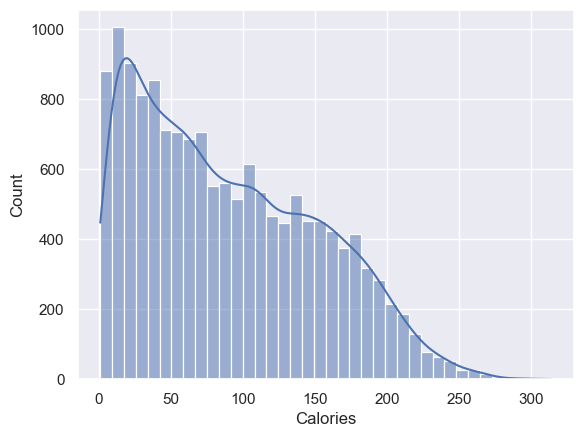

In [107]:
sns.histplot(calories_data["Calories"],kde=True)

Finding the Correlation in the dataset

In [109]:
numeric_data = calories_data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
#print(correlation)
#correlation = correlation.fillna(0)


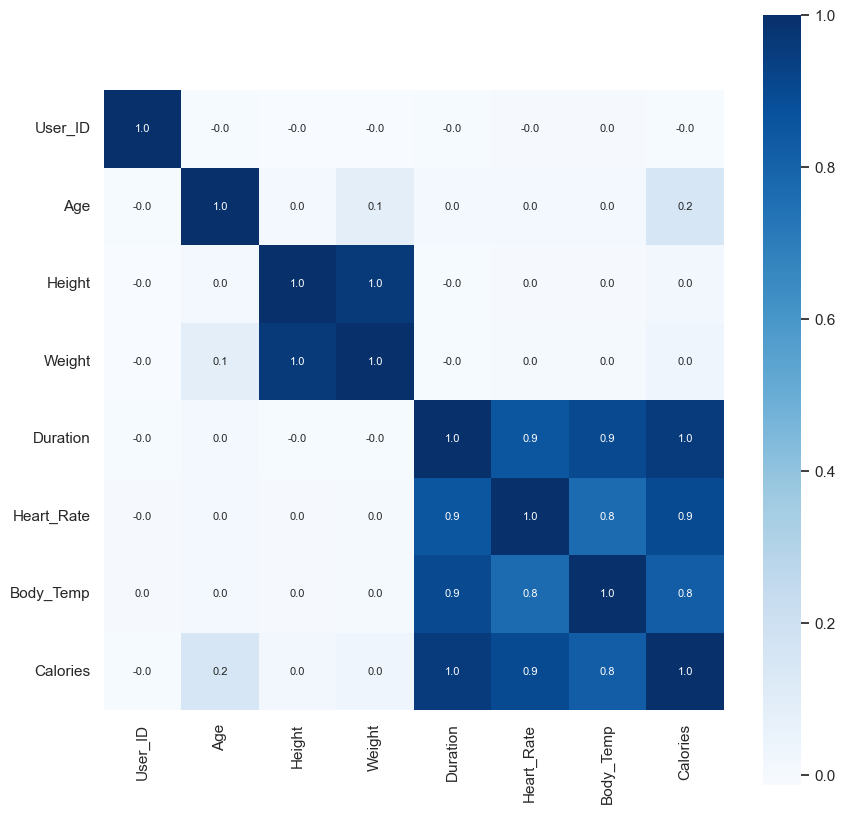

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()


In [111]:
calories_data = calories_data.infer_objects(copy=False)
calories_data = calories_data.replace({'Gender': {'male': 0, 'female': 1}})


C:\Users\udayk\AppData\Local\Temp\ipykernel_18936\3512909303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data = calories_data.replace({'Gender': {'male': 0, 'female': 1}})


In [112]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating features and Taget

In [114]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']                     

In [115]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [116]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting data into training data and test data

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [119]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

HistGradient Boosting Regressor


In [122]:
model = HistGradientBoostingRegressor()
model.fit(X_train, Y_train)

HistGradientBoostingRegressor()

Evaluating the model

Prediction on Test Data

In [125]:
test_data_prediction = model.predict(X_test)

In [126]:
print(test_data_prediction)

[108.22923947  91.75800757   4.46681262 ...  12.23061374  87.58168917
 231.63372683]


Mean Absolute Error

In [128]:
mae = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [129]:
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  1.3683915744402062
